
## Exercise 3: Dijkstra's Shortest Path Algorithm

Dijkstra's algorithm uses breadth first search to find the **shortest path** between two nodes in a graph.

It goes like this:

----

Let the node at which we are starting be called the initial node. Let the distance of node Y be the distance from the initial node to Y. Dijkstra's algorithm will assign some initial distance values and will try to improve them step by step.

1. Mark all nodes unvisited. Create a set of all the unvisited nodes called the unvisited set.
2. Assign to every node a tentative distance value: set it to zero for our initial node and to infinity for all other nodes. Set the initial node as current.
3. For the current node, consider all of its unvisited neighbours and calculate their tentative distances through the current node. Compare the newly calculated tentative distance to the current assigned value and assign the smaller one. For example, if the current node A is marked with a distance of 6, and the edge connecting it with a neighbour B has length 2, then the distance to B through A will be 6 + 2 = 8. If B was previously marked with a distance greater than 8 then change it to 8. Otherwise, the current value will be kept.(Assuming that each edge has a distance of 1)
4. When we are done considering all of the unvisited neighbours of the current node, mark the current node as visited and remove it from the unvisited set. A visited node will never be checked again.
5. If the destination node has been marked visited (when planning a route between two specific nodes) or if the smallest tentative distance among the nodes in the unvisited set is infinity (when planning a complete traversal; occurs when there is no connection between the initial node and remaining unvisited nodes), then stop. The algorithm has finished.
6. Otherwise, select the unvisited node that is marked with the smallest tentative distance, set it as the new "current node", and go back to step 3.

----

Here is a GIF of it in action:

![progress animation](../assets/Dijkstras_progress_animation.gif)

Implement `shortest_path(G, start_node, end_node)` which takes in a networkX graph, a starting node and an end node and outputs a list of nodes which is the shortest path between the start and end.

You can use networkX's shortest path function to test your result, but not to implement it.

In [60]:
# exercise 3
import networkx as nx

class Stack: 
    def __init__(self): 
        self.elements = [] 
    
    def push(self, data): 
        self.elements.append(data) 
        return data 
    
    def pop(self): 
        return self.elements.pop() 
        
    def peek(self): 
        return self.elements[-1] 
        
    def is_empty(self): 
        return len(self.elements) == 0
    
    def info(self):
        return self.elements
    
    
def shortest_path(G, start_node, end_node):
    
    currentNode = start_node
    unvisitedNodes = {}
    for node in G.nodes:
        unvisitedNodes.update({node:0})
    print(unvisitedNodes)
        
    
    print('currentNode ',currentNode)
    while len(unvisitedNodes)>0 or end_node not in unvisitedNodes:
        neightbors = Stack()
        for n in G[currentNode]:
            neightbors.push(n)
            
        next_shorter_Path = float('inf')
        while len(neightbors.elements)!=0:

            neightb = neightbors.pop()
            print('neightb: ',neightb)
            print('neightbors.elements: ',neightbors.elements)
            

            print(unvisitedNodes[currentNode])
            print(unvisitedNodes[neightb])
            unvisitedNodes[neightb] = unvisitedNodes[currentNode] + 1
            
            if neightb == end_node:
                return unvisitedNodes[neightb]
            
            if unvisitedNodes[neightb] < next_shorter_Path :
                next_shorter_Path = unvisitedNodes[neightb]
                nextCandidateNode = neightb
                print('nextCandidateNode', nextCandidateNode)
        
        #assign new currentNode
        currentNode = nextCandidateNode
        
        unvisitedNodes.pop(currentNode)
        
        
        



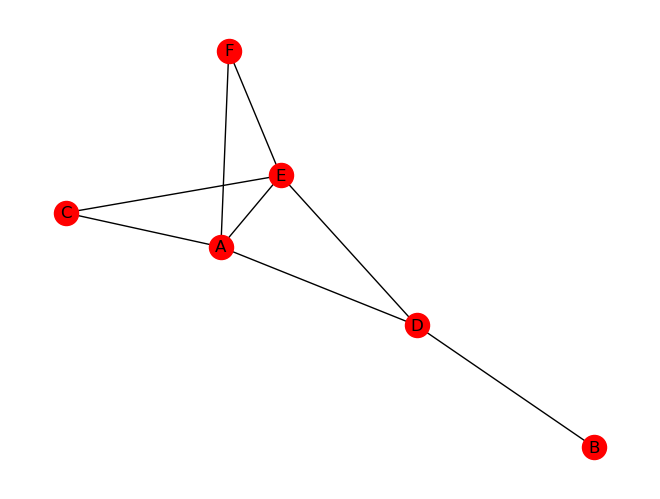

In [34]:
import networkx as nx
G= nx.Graph([('C','E'),('A','C'),('A','E'),('A','D'),('A','F'),('F','E'),('E','D'),('D','B')])

nx.draw(G, with_labels=True, node_color='red')


In [61]:
shortest_path(G, 'A', 'B')

{'C': 0, 'E': 0, 'A': 0, 'D': 0, 'F': 0, 'B': 0}
currentNode  A
neightb:  F
neightbors.elements:  ['C', 'E', 'D']
0
0
nextCandidateNode F
neightb:  D
neightbors.elements:  ['C', 'E']
0
0
neightb:  E
neightbors.elements:  ['C']
0
0
neightb:  C
neightbors.elements:  []
0
0
neightb:  E
neightbors.elements:  ['A']


KeyError: 'F'